In [ ]:
#| default_exp llm_intro

# What is a Large Language Model?

> An introduction to language models

In [3]:
#| hide
from nbdev.showdoc import *

### A large language model (LLM) is something that knows how to predict the next word in a sentence. 
- In practice, we don't necessarily deal with words but subwords or character units, we denote each unit as a token.

In [36]:
#| hide
from transformers import GPT2Tokenizer

In [37]:
# | hide
# Initialize tokenizers
gpt2_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')  # Byte Pair Encoding (BPE) subword tokenizer

**i.e. subword tokenization**

In [38]:
phrase = "Anne Martel Group Meeting"

In [39]:
#| hide
gpt2_tokens = gpt2_tokenizer.tokenize(phrase)

In [40]:
print(gpt2_tokens)

['Anne', 'ĠMart', 'el', 'ĠGroup', 'ĠMeeting']


### The magic is in the parameters. 

- Another mental image to hold for a LLM is that it is a compression of a good chunk of the internet.

```{mermaid}
flowchart LR
  A[10 TB of text data] --> B(6,000 GPU cluster)
  B --> C[140GB]
```
* As an illustrative example of the training that goes into creating a large language model. We take 10TB of text from the internet, train it in a GPU cluster for ~12 days and are left with a 140GB file. This has an estimated cost of around $2M and a compression rate of ~100x. Note that unlike a zipfile, this compression is lossy, we don't end up with an identical copy of the data.

## What is this neural network doing? 

> You can show mathematically that there's a close relationship between prediction and compression.

 - When we talk about prediction in the context of lauguage models, we're asking the model to guess the next word or sequence of words based on the input it has seen so far.
 - The better the model is at predicting the next word, the more it has learned about the patterns and structures in the language.


Now, let's think about compression. The goal of compression is to represent data using fewer bits than the original representation. A good compression algorithm is one that can identify patterns and redundancies in the data and use that knowledge to create a more compact representation.

It turns out that prediction and compression are closely linked. If a language model is good at predicting the next word, it means that it has learned the patterns and regularities in the language. In other words, it has learned how to "compress" the language by identifying its underlying structure.

Mathematically, this relationship can be expressed using information theory. The better a model is at predicting the next word, the lower its perplexity, which is a measure of how well the model fits the data. Perplexity is directly related to the cross-entropy between the true distribution of the data and the model's predictions, and cross-entropy is a fundamental concept in information theory that's closely tied to compression.

So, in a sense, a language model that's good at prediction is also a model that has learned to compress the language efficiently. This connection between prediction and compression is a key insight that underlies much of the recent progress in natural language processing.

- This statement refers to the idea that both prediction and compression involve recognizing and exploting patterns in data. Prediction, in the context of LLMs, is about forecasting the next piece of information based on that data it has seen. Compression, on the other hand, is about representing data in a more compact form without losing the original information.
- IF a model predicts well, it implies that it understands the patterns in the data. The same understanding of patterns allows for effective compression because the model can use shorthand or symbols to represent frequently occurring data sequences instead of full data. Thus a model that is good at predictin is also inherently good at compression, as both tasks leverage the model's ability to discern and utilize patterns in the data. Shannon's Entropy measures the amount of unpredictability or informaton content in a data source, which directly relates to how well data can be compressed.

	

The next word prediction is a very powerful objective, because it forces you to learn about world inside the parameters of the neural network. 

	

The network 'dreams' internet documents.
		The model generates what comes next, we sample from the model, i.e. we pick a word, and we continue to feed back in to get the next word and continue feeding that back in. 
	

For example, we get webpage dreams. IT's dreaming text from the distrobution it was trained on. It's mimicing these documents..

## How does it work?
Transformer neural network architecture; we understand in full detail this architecture. 100 billion parameters. Little is known in full detail: billions of parameters are dispersed through the network, we know how to iteratively adjust them to make it better at prediction, we can measure that this works but we don't really know how the billions of parameters collaborate to do it. 

	

We know how to iteratively adjust the parameters to make it better at the next work prediction task BUT we don't know what these parameters collaborate.

We understand that model's maintain some sort of knowledge database but this knowledge database is very strange and imperfect. The `reversal curse` as an example if you ask GPT4 about Tom Cruise's mother..This knowledge is weird and sort of 1-dimensional. This knowledge isn't stored and can be accessed in all sorts of ways. You have to ask it from a specific sort of direction almost.

In [ ]:
#| export
#| hide
from IPython.display import display,Image

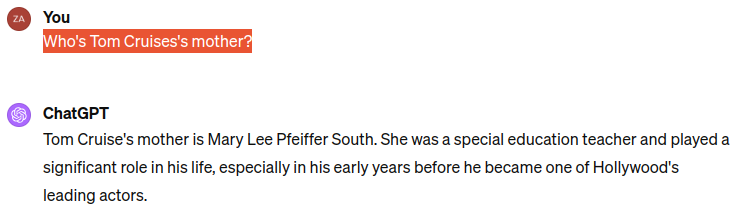

In [ ]:
#| export
#| hide
display(Image('assets/tmcrs.png'))

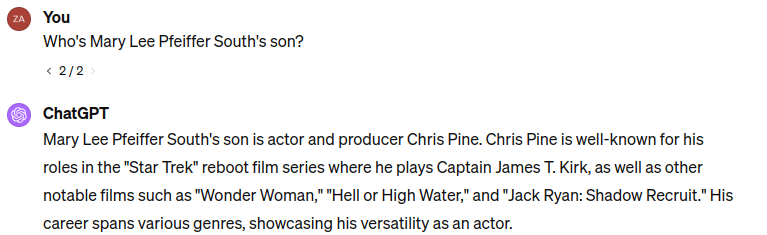

In [ ]:
#| export
#| hide
display(Image('assets/mry.png'))

This of LLMs as mostly instrutable artifacts, there not something you'd build in an engineering discipline, they're not like a car. Where you understand all the parts. They come from this long process of optimization. We don't currently know exactly how they word. There's a field call mechanistic interprebility taht tries to go in and figure out all the parts of what the neural network is doing. We can measure the text they generate.

## How do you go past pre-training and train an Assistant?
You obtain an assistant model. We want to give questions and generate answers. We basically keep the optimization identical, we swap out hte dataset from internet documents to datasets we collect manually and we collect them by using lots of people. A company will hire people, give them labelling instructions and ask people to come up with questiosn and write answers for them. Pretraining is a large quantity of text and this second stage, we prefer quality over quantity 100k. All conversations taht are high quality. We swap out the dataset, we train on these Q/A documents. Once you finetune an assistant, the model knows that it should reply in the style of an assistant...

Finetuning stage is about alignment. It's about changing the formating from internet documents to question documents in a helpful assistant manner. 

(optional stage3 of finetuning) It's much easier to compare candidate answers than write them. We can use this to further, this is RLHF.

## LLM Scaling Laws:
The first very important thing to understand about large language models space are what we call scaling laws. It turns out that hte performance in terms of the accuracy of the next word prediction task is a remarkably smooth and well behaved function of two variables

1) **N** - the number of parameters 
2) **D** - the amount of text taht you're going to train on

Given these two variables, we can estimate with remarkable accuracy how well you're going to perform on your next word prediction task. These tends do not show signs of topping out. Bigger model on more text is teh direction of progress. Algorithmic progress is not necassary - it's a bonus. Get a bigger computer, and train a bigger model for longer.

In practice however, we don't necessarily care about next word prediction accuracy BUT imperically, this prediction accuracy is correlated to a lot of evaluations taht we do care about. This is what's leading to the gold rush in larger GPU clusters.

### Reference(s):
Introduction to LLMs by Andrej Karpathy <https://www.youtube.com/watch?v=zjkBMFhNj_g&t=2525s>

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()